# Nabeel Rehemtulla

# Lab 6 Optical Spectroscopy

In [1]:
import numpy as np
from astropy.io import fits
from matplotlib import rc
import matplotlib.pyplot as plt
import pylab
%matplotlib inline
rc('figure', figsize=(12.0, 9.0))

In [2]:
#Tells python to look in this folder when looking for the data we were give
path = 'solar_spec_lab/'
#and to look into this folder when looking for the data we took with the lamp
lampPath = 'Lab6/'

#reads in and stores bias frames
biases = []
for i in range(1,11):
    zeros = (8-len(str(i)))*'0'
    biases.append(fits.getdata(path+'tBias'+zeros+'{}.fit'.format(i) , ext=0).astype(np.int))
    
#Creates an average bias frame to subtract from all measurements
avg_bias = np.asarray(biases).mean(axis=0)     

In [3]:
#declares arrays to store lamp and sun data for both on and off states
lamp_on  = []
lamp_off = []

sun_on  = []
sun_off = []

#reads in data mentioned above - as done in lab 4
for i in range(11,16):
    zeros = (8-len(str(i)))*'0'
    sun_on.append(fits.getdata(path+'t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(16,21):
    zeros = (8-len(str(i)))*'0'
    sun_off.append(fits.getdata(path+'t'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(1,4):
    zeros = (8-len(str(i)))*'0'
    lamp_on.append(fits.getdata(lampPath+'f'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))
    
for i in range(4,7):
    zeros = (8-len(str(i)))*'0'
    lamp_off.append(fits.getdata(lampPath+'f'+zeros+'{}.fit'.format(i), ext=0).astype(np.int))

In [4]:
#Subtracts mean bias from data - again, as done in lab 4
lamp_on_sub_bias = [lamp - avg_bias for lamp in lamp_on]
lamp_off_sub_bias = [lamp - avg_bias for lamp in lamp_off]
sun_on_sub_bias = [sun - avg_bias for sun in sun_on]
sun_off_sub_bias = [sun - avg_bias for sun in sun_off]

avg_lamp_off = np.asarray(lamp_off_sub_bias).mean(axis=0)
avg_sun_off = np.asarray(sun_off_sub_bias).mean(axis=0)

In [5]:
#subtracts average of off state from the on state to further reduce noise
lamp_corrected = [lamp_on - avg_lamp_off for lamp_on in lamp_on_sub_bias]
sun_corrected  = [sun_on - avg_sun_off for sun_on in sun_on_sub_bias]

avg_lamp = np.asarray(lamp_corrected).mean(axis=0)
avg_sun = np.asarray(sun_corrected).mean(axis=0)

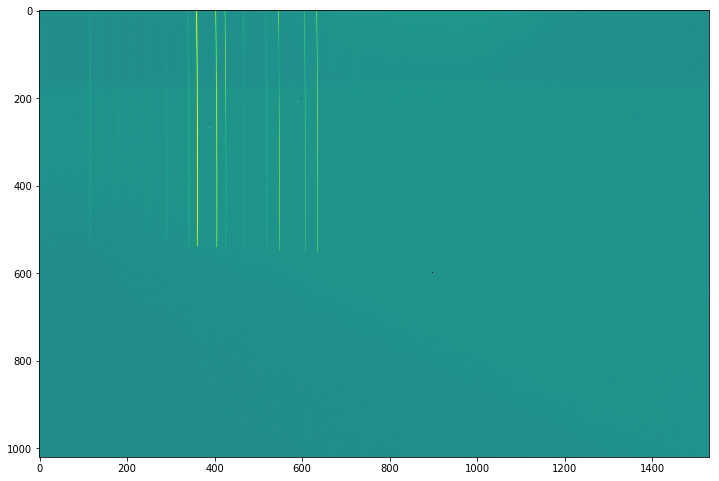

In [6]:
#Presents the twice corrected image of Neon's spectrum taken through the spectrograph
plt.imshow(avg_lamp)
plt.show()

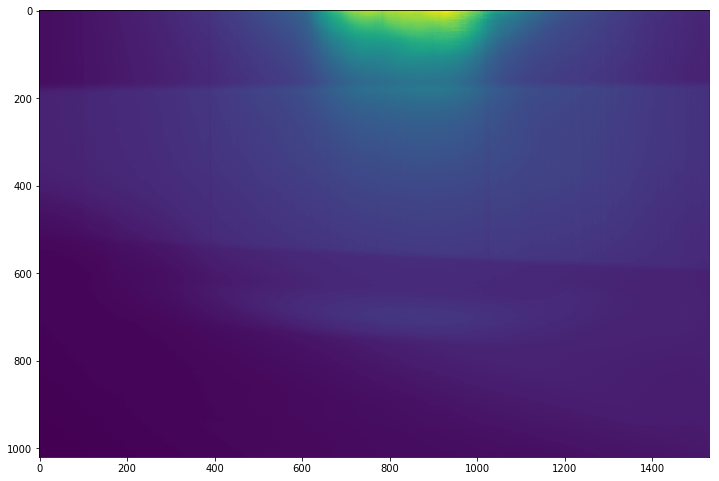

In [7]:
#Presents the twice corrected image of the Sun's spectrum taken through the spectrograph
plt.imshow(avg_sun)
plt.show()

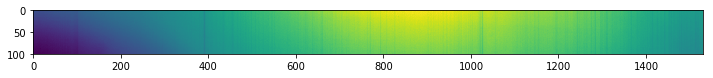

In [8]:
#Presents only the area of the image we are interested in
    #We are interested in an area where the absorption lines are easily visible
plt.imshow(avg_sun[400:500,:])

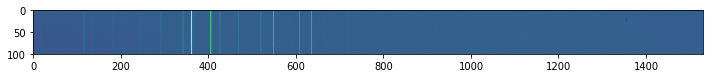

In [9]:
#Presents only the area of the image we are interested in
    #We are interested in an area where the emission lines are easily visible
plt.imshow(avg_lamp[400:500,:])

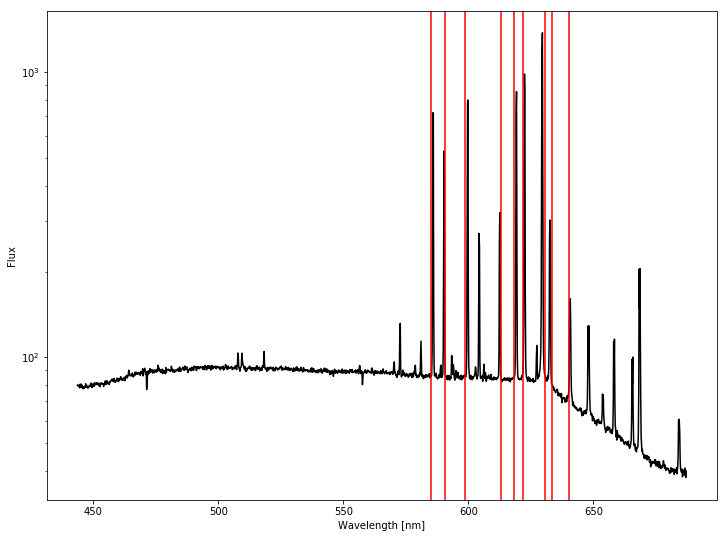

In [10]:
#Averages the value along each column in the region that our 
#spectra look relatively free of contamination
lamp_good = np.asarray(avg_lamp[400:500,:]).mean(axis=0) 

#does the same as above for the sun data
sun_good  = np.asarray(avg_sun[400:500,:]).mean(axis=0)

#emission lines of Neon from http://astro.u-strasbg.fr/~koppen/discharge/ 
neon_lines = [ 585.2, 590.643, 598.791, 612.845, 618.215, 621.728, 630.479, 633.443, 640.225 ]

#these are the stretch and shift we adjusted to calibrate our iamge
stretch = 6.28
shift = 443.6

#apply the stretch and shift factor to the image
calibrated_lamp_good = (np.arange(len(lamp_good)) / stretch) + shift

#we flip the image because the CCD has higher wavelength on the left 
    #Our convention is the opposite
plt.plot(np.flip(calibrated_lamp_good,0), lamp_good, 'k-')

#This graph looks better with a log scale on the y axis
plt.yscale('log')

#adds the lines to the graph
for line in neon_lines:
    plt.axvline(line,color='r')

#labels the axes and plots the Neon spectrum graph
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux')
plt.show()

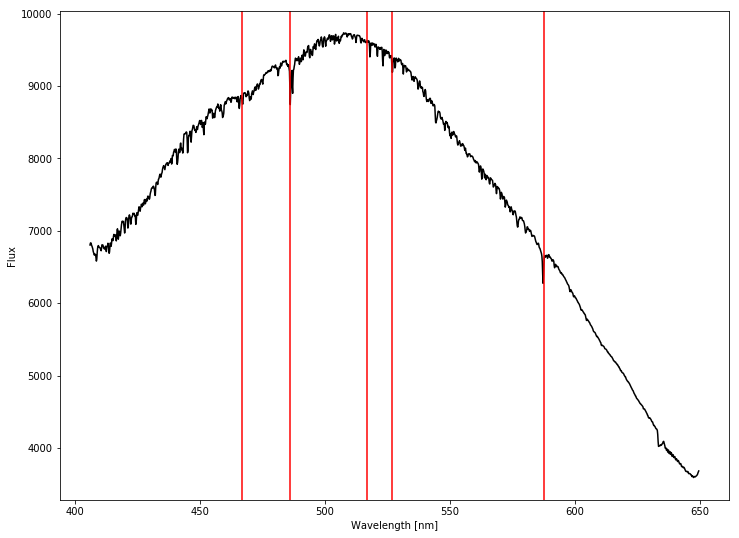

In [11]:
#this is done in the same way as it was done above

sun_lines = [ 466.814, 486.134, 516.733, 527, 587.5618 ]

sun_stretch = 6.28
sun_shift = 406.05

calibrated_sun_good = (np.arange(len(sun_good)) / sun_stretch) + sun_shift

plt.plot(np.flip(calibrated_sun_good,0), sun_good, 'k-') 
#We decided to not plot the graph with a log y scale because the absoption lines
#were more pronounced in a linear y scale

for line in sun_lines:
    plt.axvline(line,color='r')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Flux')
plt.show()